1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


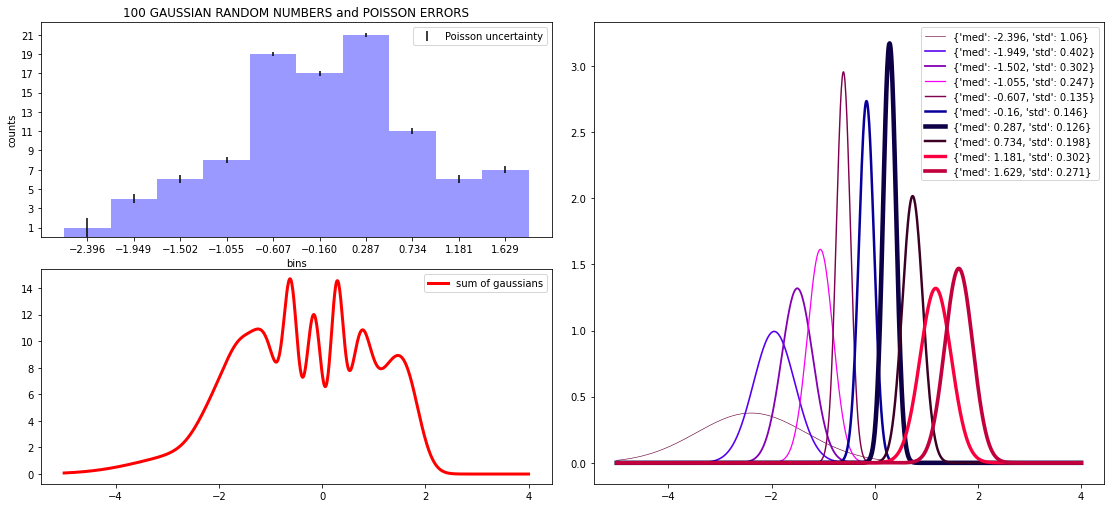

In [97]:
%matplotlib inline
import numpy as np
from numpy import random as rdm
from matplotlib import pyplot as plt
from scipy.stats import norm
import scipy
#from matplotlib.ticker import MultipleLocator as ML

rdm.seed(42)
X = rdm.normal(0, 1, 100)#DATA

count, bin_edges = np.histogram(X, bins = 10, density=False)
labelsx = np.arange(min(count), max(count) +1 ,2)
bin_cntrs = 0.5*(bin_edges[1:]+bin_edges[:-1])
p_err = 1/np.sqrt(count)

fig = plt.figure(figsize=(15.5, 7))

ax1 = plt.subplot(221)
ax2 = plt.subplot(122)
ax3 = plt.subplot(223)
fig.tight_layout()

ax1.set_xlabel('bins')
ax1.set_ylabel('counts')
ax1.set_title('100 GAUSSIAN RANDOM NUMBERS and POISSON ERRORS')
ax1.set_yticks(labelsx)
ax1.set_xticks(bin_cntrs)

width = (max(bin_edges) - min(bin_edges))/10
ax1.bar(bin_cntrs, count, width=width, color='b', alpha = 0.4)
ax1.errorbar(bin_cntrs,count, yerr=p_err, fmt = ' ', c = 'black', label = 'Poisson uncertainty')

a = np.linspace(-5,4,1000)
#gauss = np.empty(shape(10,1000))

Sgauss = 0
i = 0
for x in bin_cntrs:
    std = 1.06 * np.sqrt(1/count[i]) * count[i]**(-1/5)
    drv = norm(loc = x, scale = std).pdf(a)
    #gauss.append(rv.rvs(size = len(a)))
    ax2.plot(a,drv, label = {'med':round(x,3),'std':round(std,3)},\
             c = (rdm.random(),0,rdm.random()),linewidth = 5*rdm.random())
    Sgauss += drv
    i += 1
         
I = scipy.integrate.trapz(count, bin_cntrs)
Sgauss = (Sgauss/10)*I 
ax3.plot(a,Sgauss,color='r',label = 'sum of gaussians',linewidth = 3)

ax3.legend()
ax2.legend()
ax1.legend()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

100


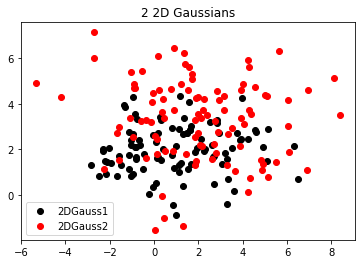

In [35]:
#tutto questo si può fare più velocemente con np.random.multivariate_normal
def df_creator(n_rows,n_col,mu,sigma): #it creates DataFrames of selected dimension
    import pandas as pd
    import numpy as np
    mu = np.array(mu)
    sigma = np.array(sigma)
    #return df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
    values = mu.T + sigma.T * np.random.randn(n_rows,n_col)
    values = values.T 
    #print(values)
    d = {}
    keys = range(n_col)
    for i in keys:
        d[i] = values[i]
    return pd.DataFrame(d)

import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Gauss1': [df_creator(100,2,[1,2],[2,1])], 'Gauss2': [df_creator(100,2,[2,3],[3,2])]})
#print(df.keys())
#df.hist(column = 0, bins = 333)

print(len(df['Gauss1'].values[0][0].values))

fig, ax = plt.subplots()
ax.scatter(df['Gauss1'].values[0][0].values, df['Gauss1'].values[0][1].values, c = 'black', label = '2DGauss1')
ax.scatter(df['Gauss2'].values[0][0].values, df['Gauss2'].values[0][1].values, c = 'red', label = '2DGauss2')
plt.title('2 2D Gaussians')

ax.legend()
plt.show()

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

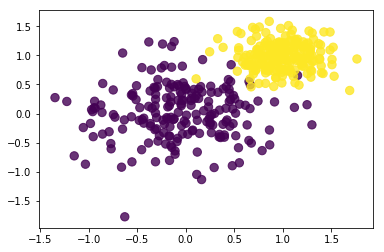

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

0.5779133666359255 10.025258299436526


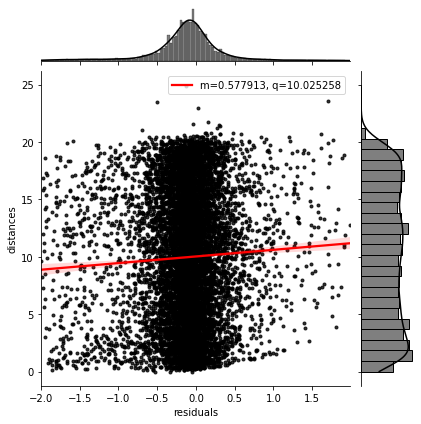

In [96]:
import numpy as np
import pandas as pd
from scipy.stats import linregress as lin
import seaborn as sns

content = np.load("/Users/Luca/data/residuals_261.npy", allow_pickle = True)

df = pd.DataFrame(content.item())
cdf = df[(np.abs(df.residuals) < 2)]

lin_res = lin(cdf['residuals'], cdf['distances'])
m = lin_res[0]
q = lin_res[1]
print(m,q)

g = sns.jointplot(x = 'residuals', y = 'distances', data = cdf, kind = 'reg', marker = '.',\
                  color = 'black', joint_kws={'line_kws':{'color':'red'}})
g.ax_joint.legend(['m={:f}, q={:f}'.format(m,q)])

#manca l'ultima parte